In [ ]:
import math
import random
import requests
import time

import numpy as np
import torch
import torchvision

import matplotlib.patches as patches
import matplotlib.pyplot as plt
import torch.nn.functional as F

from io import BytesIO
from PIL import Image

# Lakota AI Code Camp Lesson 15: Bounding Boxes and Anchor Boxes

Object detection is a machine learning task that seeks to determine whether a certain object is in a picture and to determine where at in the picture the object is.
It's used in autonomous vehicles and filters on messaging apps.
To make these predictions, a model takes in a picture and outputs a smaller portion of the picture (usually a box) and what's within the box.

## Bounding Boxes

A bounding box is a box that contains an object within an image.
We've already seen an example in Lecture 3.

There are several formats that bounding boxes come in.
1.  In the bottom left, top right format.
So, $(x_{1}, y_{1})$ are the coordinates for the bottom left and $(x_{2}, y_{2})$ are the coordinates for the top right.
This will usually be in a $4$-dimensional vector $(x_{1}, y_{1}, x_{2}, y_{2})$.
1.  Center coordinates with width and height.
The coordinates $(x, y)$ will be the coordinates of the center of the box and $(w, h)$ will be the width and height of the bounding box.
This will also be a $4$-dimensional vector $(x, y, w, h)$.
1.  Bottom left coordinates with width and height.
The coordinates $(x, y)$ will be the coordinates of the bottom left of the box and $(w, h)$ will be the width and height of the bounding box.
This will also be a $4$-dimensional vector $(x, y, w, h)$.

It's not always clear in the documentation which format is used.
So, some experimentation with the data will be required.

We'll look at more examples here.

In [ ]:
def show_bboxes_kitti(img, label):
    fig, ax = plt.subplots()

    # Display the image
    ax.imshow(img)

    # Create a Rectangle patch
    rect = []
    for b in label:
        rectangle = b['bbox']
        x1, y1, x2, y2 = rectangle
        h = abs(x2-x1)
        w = abs(y2-y1)
        x = x1
        y = y1
        rect.append(patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none'))

    # Add the patch to the Axes
    for r in rect:
        ax.add_patch(r)

    plt.show()

In [ ]:
kitti_ds = torchvision.datasets.Kitti(root='./data',
                                      train=True,
                                      download=True)

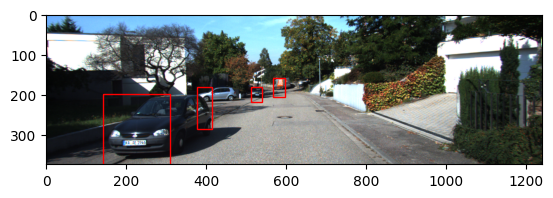

In [ ]:
n = np.random.randint(low=0, high=len(kitti_ds))

show_bboxes_kitti(kitti_ds[n][0], kitti_ds[n][1])

## Anchor Boxes

Anchor boxes are part of the neural network prediction.
Instead of predicting the bounding box directly, some methods try to predict the offset of the bounding box based on several anchor boxes.

You can transform any box into any other box by translating the box and stretching or compressing the width and height.
The predictions are then offsets of the anchor boxes.